# NLP CA2 - Spring 2021

- Sajjad Pakdaman Savoji
- 810195517

## Import necessary libraries

In [48]:
%load_ext autoreload
%autoreload 2

from libs import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data

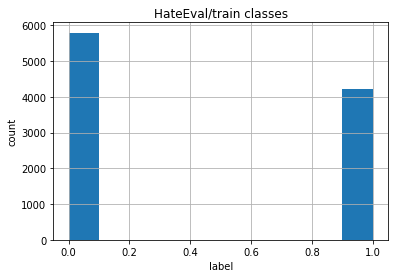

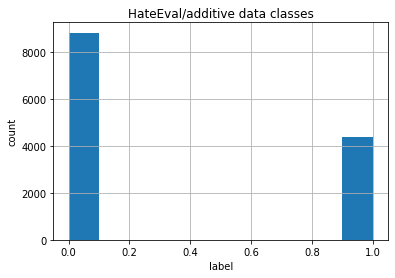

In [49]:
hate_train_path = "Data/HateEval/train.csv"
hate_add_path = "Data/HateEval/add.csv"
hate_test_path = "Data/HateEval/test.csv"
hate_train, hate_test, hate_add = load_data(hate_train_path, hate_test_path, hate_add_path)

## Data Balancing

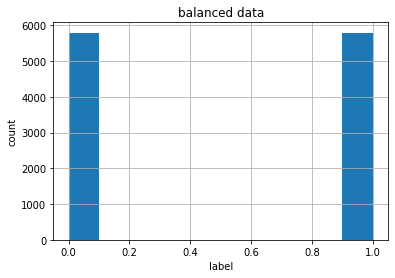

In [50]:
bal_train = balance_data(hate_train, hate_add)
plot_label_hist(bal_train.label, './Res/Data_stats/bal_train.jpg', 'balanced data')

## Preprocessing 

1- removing emojies   
2- removing links   
3- parsing Hashtags

In [51]:
prep_train = prep(bal_train, [costum_preprocessing, lemma, stem], word_tokenizer)
prep_test  = prep(hate_test, [costum_preprocessing, lemma, stem], word_tokenizer)

In [52]:
prep_train

,text,label
0,"[hurray, save, u, mani, way]",1
1,"[whi, would, young, fight, age, men, vast, maj...",1
2,"[illeg, dump, kid, border, like, road, kill, r...",1
3,"[NY, time, ., nearli, white, state, pose, arra...",0
4,"[orban, brussel, ., european, leader, ignor, p...",0
...,...,...
4673,"[year, ., pathet, .]",1
4675,"[holder, prison, .]",1
4679,"[So, whi, even, make, specif, whentel, gun, co...",1
4685,"[total, disgrac, name, call, ., disgust]",1


## feature extraction

In [53]:
fe = feature_extractor(cutoff=10)
fe.fit(flatten(prep_train.text))

In [54]:
train_F, train_L= fe.transfer_df(prep_train)
test_F, test_L = fe.transfer_df(prep_test)

## train classifiers

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [56]:
gnb = GaussianNB()
lrc = LogisticRegression(max_iter=250)
scaler = StandardScaler()
train_F_scaled = scaler.fit_transform(train_F)
train_L_scaled = 2*train_L-1
test_F_scaled = scaler.transform(test_F)
test_L_scaled = 2*test_L-1

In [57]:
gnb_scores = cross_val_score(gnb, train_F, train_L, cv=5)

In [58]:
lrc_scores = cross_val_score(lrc, train_F_scaled, train_L_scaled, cv=5)

In [59]:
gnb_scores

array([0.6537133 , 0.67918826, 0.57599309, 0.4835924 , 0.57642487])

In [60]:
print(f'gnb mean = {np.mean(gnb_scores)}, std = {np.std(gnb_scores)}')

gnb mean = 0.5937823834196891, std = 0.0687683823828349


In [61]:
lrc_scores

array([0.67055268, 0.66925734, 0.59110535, 0.55094991, 0.56174439])

In [62]:
print(f'lrc mean = {np.mean(lrc_scores)}, std = {np.std(lrc_scores)}')

lrc mean = 0.6087219343696028, std = 0.05165736414340544


## evaluate models

In [63]:
gnb.fit(train_F, train_L)
lrc.fit(train_F_scaled, train_L_scaled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
gnb_pred_labels = gnb.predict(test_F)
lrc_pred_labels = lrc.predict(test_F_scaled)

In [65]:
evaluate_model(test_L, gnb_pred_labels, "gnb|test")
evaluate_model(test_L_scaled, lrc_pred_labels, "lrc|test")

____________________________________________________________________________________________________
gnb|test
accuracy score  = 0.47733333333333333
precision score = 0.43662551440329217
recall score    = 0.8420634920634921
f1 macro score  = 0.448139935944814
f1 micro score  = 0.47733333333333333
____________________________________________________________________________________________________
____________________________________________________________________________________________________
lrc|test
accuracy score  = 0.5306666666666666
precision score = 0.46757230499561786
recall score    = 0.8468253968253968
f1 macro score  = 0.5148305191818829
f1 micro score  = 0.5306666666666666
____________________________________________________________________________________________________


In [66]:
gnb_pred_labels = gnb.predict(train_F)
lrc_pred_labels = lrc.predict(train_F_scaled)

In [67]:
evaluate_model(train_L, gnb_pred_labels, "gnb|train")
evaluate_model(train_L_scaled, lrc_pred_labels, "lrc|train")

____________________________________________________________________________________________________
gnb|train
accuracy score  = 0.7064766839378238
precision score = 0.6576552815508374
recall score    = 0.8613126079447323
f1 macro score  = 0.699266858474194
f1 micro score  = 0.7064766839378238
____________________________________________________________________________________________________
____________________________________________________________________________________________________
lrc|train
accuracy score  = 0.812607944732297
precision score = 0.8193366266760762
recall score    = 0.8020725388601037
f1 macro score  = 0.8125871428840348
f1 micro score  = 0.812607944732297
____________________________________________________________________________________________________


## creat word cloud


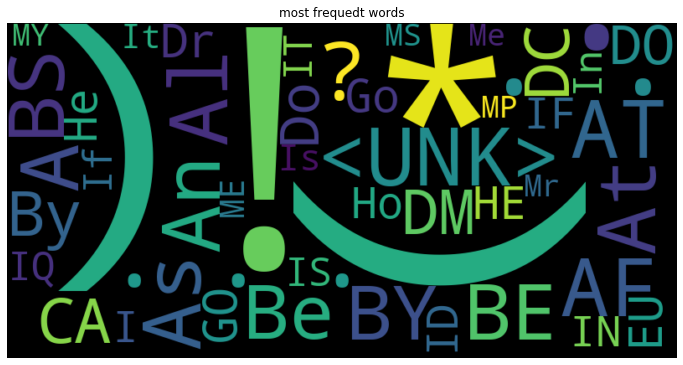

In [68]:
plot_wordcloud(sorted(fe.vocab), "most frequedt words")